In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='talk', palette='colorblind')

## Keywords

In [2]:
df = pd.read_csv('paperlist.tsv', index_col=0, sep='\t')
print('# papers:', len(df))
df.head()

# papers: 160


,title,link,keywords,abstract
paper_id,,,,
gx7TEqAogg8,Challenging America: Digitized Newspapers as a...,https://openreview.net/forum?id=gx7TEqAogg8,"Machine Learning Challenges, Language Modeling...","This paper introduces an ML challenge, named C..."
yYQuqGcxFvb,GitTables: A Large-Scale Corpus of Relational ...,https://openreview.net/forum?id=yYQuqGcxFvb,"relational tables, semantic annotations, table...",The practical success of deep learning has spa...
xVQMrDLyGst,Contemporary Symbolic Regression Methods and t...,https://openreview.net/forum?id=xVQMrDLyGst,"symbolic regression, benchmarks, physics, diff...",Many promising approaches to symbolic regressi...
lwlkxYsGDi,DIPS-Plus: The Enhanced Database of Interactin...,https://openreview.net/forum?id=lwlkxYsGDi,"Neural networks, protein interface prediction,...",How and where proteins interface with one anot...
HQ-6VDYUxGn,PROCAT: Product Catalogue Dataset for Implicit...,https://openreview.net/forum?id=HQ-6VDYUxGn,"set-to-sequence, structure prediction, product...","In this dataset paper we introduce PROCAT, a n..."


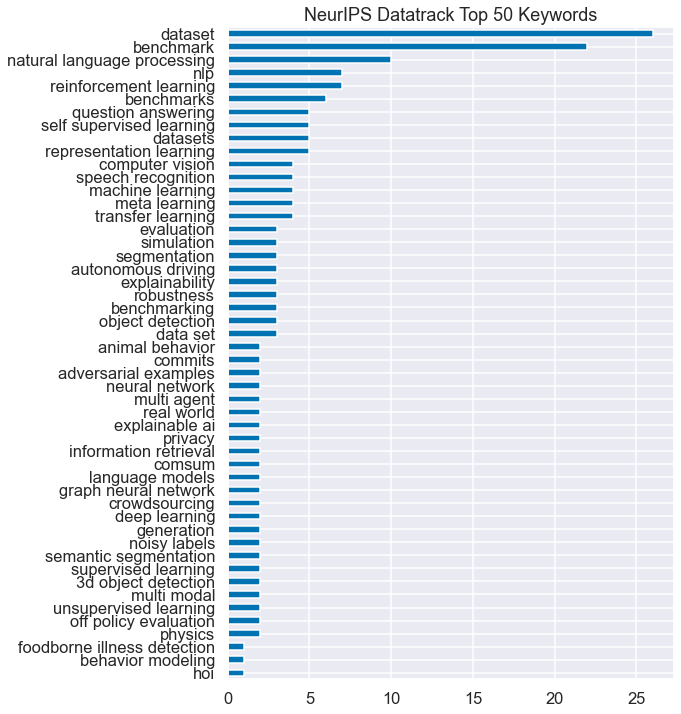

In [3]:
counts = pd.Series(
    ', '.join(df['keywords'].dropna()).lower().replace('-', ' ').replace('networks', 'network').split(',')
).str.strip().value_counts().sort_values(ascending=True)
counts.iloc[-50:].plot.barh(figsize=(8, 12), title='NeurIPS Datatrack Top 50 Keywords')
plt.savefig('asset/keywords.png', dpi=300, bbox_inches='tight')

## Rating Distributions

In [5]:
ratings = pd.read_csv('ratings.tsv', sep='\t', index_col=0)
print(ratings.iloc[:, :-1].stack().mean())
ratings.head()

5.729622266401591


,0,1,2,3,4,decision
paper_id,,,,,,
gx7TEqAogg8,7.0,5.0,5.0,6.0,NaN,Unknown
yYQuqGcxFvb,4.0,6.0,7.0,NaN,NaN,Unknown
xVQMrDLyGst,6.0,6.0,8.0,NaN,NaN,Unknown
lwlkxYsGDi,7.0,4.0,3.0,NaN,NaN,Unknown
HQ-6VDYUxGn,4.0,7.0,5.0,NaN,NaN,Unknown


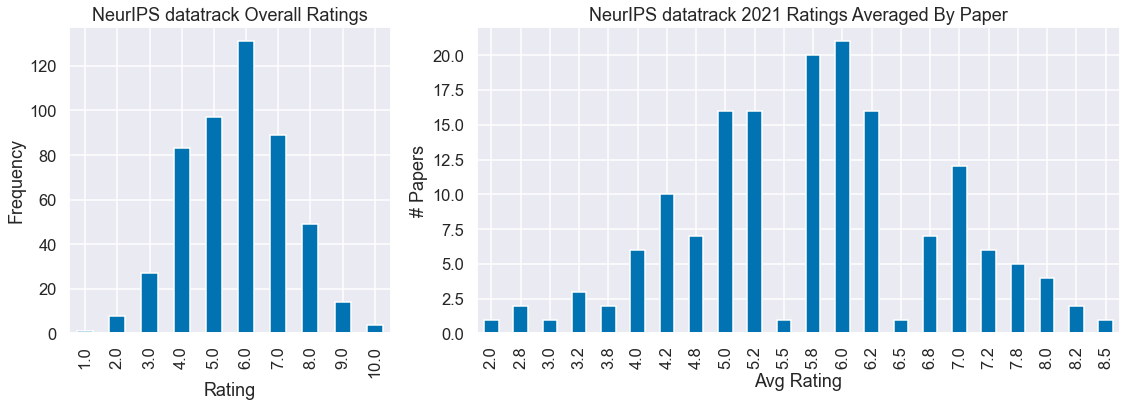

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})
ratings.iloc[:, :-1].stack().value_counts().sort_index().plot.bar(
    ax=axes[0], title='NeurIPS datatrack Overall Ratings', xlabel='Rating', ylabel='Frequency')
ratings.iloc[:, :-1].mean(axis=1).mul(4).round().div(4).round(1).value_counts().sort_index().plot.bar(
    ax=axes[1], title='NeurIPS datatrack 2021 Ratings Averaged By Paper', xlabel='Avg Rating', ylabel='# Papers')
plt.tight_layout()
plt.savefig('asset/ratings_dist.png', dpi=300, bbox_inches='tight')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


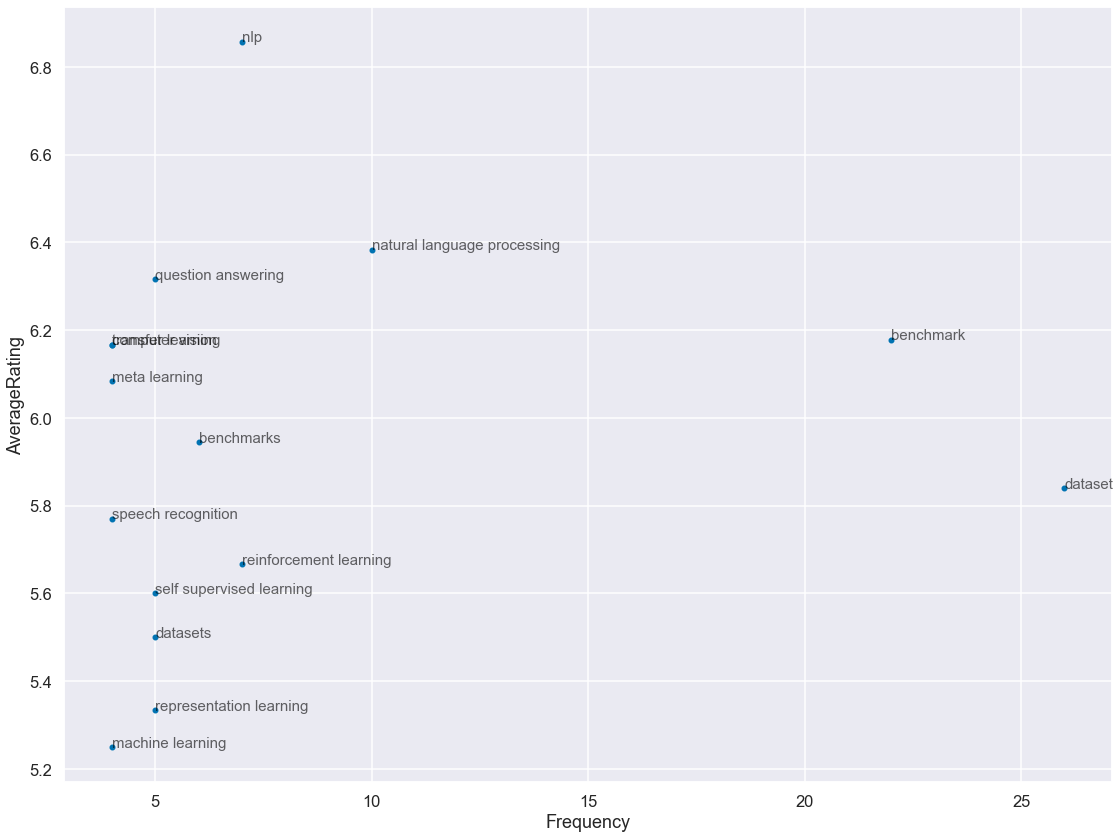

In [13]:
data = {}
for keywords, rating in zip(df.keywords, ratings.iloc[:, :-1].mean(axis=1)):
    if (isinstance(keywords, float) and np.isnan(keywords)) or np.isnan(rating):
        continue
    for keyword in keywords.lower().replace('-', ' ').replace('networks', 'network').split(','):
        data.setdefault(keyword.strip(), []).append(rating)

t = pd.DataFrame({
    'Frequency': [len(v)for v in data.values()], # clip to 50
    'AverageRating': [np.mean(v) for v in data.values()],
    'Keyword': list(data.keys())
}).query('Frequency>3')
t.plot.scatter(x='Frequency', y='AverageRating', figsize=(16, 12))

for i in range(len(t)):
     plt.text(t.Frequency.iloc[i], t.AverageRating.iloc[i], t.Keyword.iloc[i], 
              horizontalalignment='left', 
              size='small', color='black', alpha=0.6)

plt.tight_layout()
plt.savefig('asset/keyword_ratings.png', dpi=300, bbox_inches='tight')

## Top 20 Papers

In [17]:
comb_df = pd.DataFrame({
    'AvgRating': ratings.iloc[:, :-1].mean(axis=1).round(2),
    'Title': '[' + df['title'] + ']' + '(' + df['link'] + ')',
    'Ratings': ratings.iloc[:, :-1].apply(lambda x: ', '.join(x.dropna().astype(int).astype(str).values), axis=1),
    'Decision': ratings.iloc[:, -1],
})

comb_df = comb_df.sort_values('AvgRating', ascending=False).reset_index(drop=True)
comb_df.index += 1
comb_df.index.name = 'Rank'
comb_df.head(40)

,AvgRating,Title,Ratings,Decision
Rank,,,,
1,8.50,[RadGraph: Extracting Clinical Entities and Re...,"9, 9, 9, 7",Unknown
2,8.33,[Pervasive Label Errors in Test Sets Destabili...,"7, 10, 8",Unknown
3,8.33,[ATOM3D: Tasks on Molecules in Three Dimension...,"9, 9, 7",Unknown
4,8.00,[Programming Puzzles](https://openreview.net/f...,"8, 8, 8",Unknown
5,8.00,[CommonsenseQA 2.0: Exposing the Limits of AI ...,"7, 7, 10",Unknown
6,8.00,[A Large-Scale Database for Graph Representati...,"7, 8, 9",Unknown
7,8.00,[CCNLab: A Benchmarking Framework for Computat...,"8, 9, 7",Unknown
8,7.67,[EEGEyeNet: a Simultaneous Electroencephalogra...,"6, 10, 7",Unknown
9,7.67,[It's COMPASlicated: The Messy Relationship be...,"8, 9, 6",Unknown
